# Sentimentsanalyse GGD

In [3]:
# import needed libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import itertools

In [4]:
pagelinks = []
url = "https://nos.nl/zoeken?q=GGD&date=2020-01-01&page=1"

while True:
    page = requests.get(url) 
    soup = BeautifulSoup(page.content, 'html.parser')
    weblinks = soup.find_all("a", {"class": "search-results__link"})
    pl =[]
    for i in range(len(weblinks)):    
            pl.append('http://nos.nl'+ weblinks[i].get('href'))
    pagelinks.append(pl)
    if soup.find_all("span", {"class": "js-update link-hover"}):
        test = soup.find("span", {"class": "js-update link-hover"})
        url = "https://nos.nl" + test.get('data-url') + "&date=2020-01-01"
    else:
        break
        
#print(pagelinks)

import itertools
list_links = list(itertools.chain(*pagelinks))

In [5]:
date = []
url = "https://nos.nl/zoeken?q=GGD&date=2020-01-01&page=1"
while True:
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    time = soup.find_all("time", {"class": "search-results__time"})
    dt = []
    for i in range(len(time)):   
          dt.append(time[i].get('datetime'))
    date.append(dt)
    if soup.find_all("span", {"class": "js-update link-hover"}):
        next_page = soup.find("span", {"class": "js-update link-hover"})
        url = "https://nos.nl" + next_page.get('data-url') + "&date=2020-01-01"
    else:
        break

list_dates = list(itertools.chain(*date))

In [6]:
title = []
url = "https://nos.nl/zoeken?q=GGD&date=2020-01-01&page=1"
while True:
    page = requests.get(url) 
    soup = BeautifulSoup(page.content, 'html.parser')
    titles = soup.find_all("h3", {"class": "search-results__title"})
    tt = []
    for i in range(len(titles)):    
          tt.append(titles[i].get_text())
    title.append(tt)
    if soup.find_all("span", {"class": "js-update link-hover"}):
        next_page = soup.find("span", {"class": "js-update link-hover"})
        url = "https://nos.nl" + next_page.get('data-url') + "&date=2020-01-01"
    else:
        break
        
list_titles = list(itertools.chain(*title))

In [7]:
thearticle = []
for link in list_links:   
    # store the text for each article
    paragraphtext = []   
    # get url
    url = link
    # get page text
    page = requests.get(url)
    # parse with BFS
    soup = BeautifulSoup(page.text, 'html.parser')   
    # get main article page
    #articlebody = soup.find("div", {"class":'contentBody_pZG9fiBw'})
    # get text
    if "video" in link:
        articletext = soup.find_all('p', {"class": 'videoDescription_bAtNIfDM'})
    else:
        articletext = soup.find_all('p', {"class":'text_3v_J6Y0G'})
    # print text
    for paragraph in articletext:
        # get the text only
        text = paragraph.get_text()
        paragraphtext.append(text)       
    # combine all paragraphs into an article
    thearticle.append(paragraphtext)

In [8]:
# merge all
df = pd.DataFrame(
    {'datetime': list_dates,
     'pagelink': list_links,
     'title': list_titles,
     'text': thearticle})
df.head()

,datetime,pagelink,title,text
0,2021-05-10T21:15:30+0200,http://nos.nl/nieuwsuur/artikel/2380218-niet-i...,Niet iedere GGD registreert coronavaccinatie i...,[Niet alle GGD's werken mee aan het registrere...
1,2021-05-14T12:32:52+0200,http://nos.nl/nieuwsuur/video/2380778-welke-le...,Welke lessen trekt de GGD uit de vaccinatiecam...,[\n We spreken met Nicolette Rigter over ...
2,2021-05-14T22:33:46+0200,http://nos.nl/nieuwsuur/artikel/2380772-ggd-wi...,GGD wil landelijke crisisorganisatie tussen mi...,[Koepelorganisatie GGD GHOR Nederland wil dat ...
3,2021-05-07T16:29:08+0200,http://nos.nl/artikel/2379760-ggd-komt-nog-dui...,GGD komt nog duizenden werknemers tekort voor ...,[De GGD zoekt nog minstens 6000 en waarschijnl...
4,2021-05-04T12:58:40+0200,http://nos.nl/artikel/2379364-verdachten-datad...,Verdachten datadiefstal GGD: 'Niet van bewust ...,[Twee verdachten in de strafzaak rond het 'GGD...


In [9]:
df2 = df[df["pagelink"].str.contains("liveblog")==False].reset_index(drop=True)
df2['text'].astype(str)
df2

,datetime,pagelink,title,text
0,2021-05-10T21:15:30+0200,http://nos.nl/nieuwsuur/artikel/2380218-niet-i...,Niet iedere GGD registreert coronavaccinatie i...,[Niet alle GGD's werken mee aan het registrere...
1,2021-05-14T12:32:52+0200,http://nos.nl/nieuwsuur/video/2380778-welke-le...,Welke lessen trekt de GGD uit de vaccinatiecam...,[\n We spreken met Nicolette Rigter over ...
2,2021-05-14T22:33:46+0200,http://nos.nl/nieuwsuur/artikel/2380772-ggd-wi...,GGD wil landelijke crisisorganisatie tussen mi...,[Koepelorganisatie GGD GHOR Nederland wil dat ...
3,2021-05-07T16:29:08+0200,http://nos.nl/artikel/2379760-ggd-komt-nog-dui...,GGD komt nog duizenden werknemers tekort voor ...,[De GGD zoekt nog minstens 6000 en waarschijnl...
4,2021-05-04T12:58:40+0200,http://nos.nl/artikel/2379364-verdachten-datad...,Verdachten datadiefstal GGD: 'Niet van bewust ...,[Twee verdachten in de strafzaak rond het 'GGD...
...,...,...,...,...
853,2020-02-02T13:47:21+0100,http://nos.nl/artikel/2321332-minister-bruins-...,Minister Bruins: Nederland goed voorbereid op ...,[Minister Bruins voor Medische Zorg zegt dat d...
854,2020-01-24T00:03:18+0100,http://nos.nl/artikel/2319941-ook-maatregelen-...,Ook maatregelen Rotterdam en Utrecht tegen lod...,[Utrecht en Rotterdam gaan op grote schaal gem...
855,2020-01-21T08:27:45+0100,http://nos.nl/artikel/2319554-meer-kinderen-be...,Meer kinderen besmet met hepatitis A in Zuid-H...,[Op een basisschool in Schoonhoven zijn vier k...
856,2020-02-07T16:02:31+0100,http://nos.nl/artikel/2322000-zeker-165-gemeen...,Zeker 165 gemeenten weten niets over lood in w...,[Op zijn minst 165 Nederlandse gemeenten weten...


In [12]:
df2['title & text'] = df2['title'] + df2['text'].astype(str)

df2['pure_title'] = df2['title'].str.replace('[^A-Za-z0-9 ]+', ' ')

df2['text'] = df2['text'].astype(str)
df2['pure_text'] = df2['text'].str.replace('[^A-Za-z0-9 ]+', ' ')

df2['pure_title & text'] = df2['title & text'].str.replace('[^A-Za-z0-9 ]+', ' ')

df2['pure_title']= df2['pure_title'].str.lower()
df2['pure_text']= df2['pure_text'].str.lower()
df2['pure_title & text']= df2['pure_title & text'].str.lower()
df2.head()

In [14]:
negative = pd.read_csv('negative_words_nl.txt', header=None)
negative = negative.rename(columns={0: 'word'})
negative['negative'] = 1
positive = pd.read_csv('positive_words_nl.txt', header=None)
positive = positive.rename(columns={0: 'word'})
positive['positive'] = 1
positive.head()
words = positive.append(negative).fillna(0)
words.head()

,word,positive,negative
0,eerste,1.0,0.0
1,naam,1.0,0.0
2,waar,1.0,0.0
3,wel,1.0,0.0
4,zoals,1.0,0.0


In [15]:
df_sentiment = df2[['pure_title & text']]
df_sent = df_sentiment['pure_title & text'].str.split(' ', expand=True).stack().reset_index(level=0)
df_sent = df_sent.rename(columns={0: 'word'})
df_sent.head()

,level_0,word
0,0,niet
1,0,iedere
2,0,ggd
3,0,registreert
4,0,coronavaccinatie


In [16]:
join = df_sent.merge(words, how='inner', on='word')
join_sum = join.groupby('level_0')[["positive", "negative"]].sum()
join_sum.head()

,positive,negative
level_0,,
0,22.0,24.0
1,2.0,1.0
2,26.0,18.0
3,24.0,50.0
4,19.0,31.0


In [17]:
#sentiments = df2.merge(join_sum, how='left', left_index=True, right_index=True)
#sentiments.head()

In [18]:
data = df2.merge(join_sum, left_index=True, right_index=True, how='left')
data = data.drop(columns=['title', 'text', 'pure_title', 'pure_text'])
data.head()

,datetime,pagelink,title & text,pure_title & text,positive,negative
0,2021-05-10T21:15:30+0200,http://nos.nl/nieuwsuur/artikel/2380218-niet-i...,Niet iedere GGD registreert coronavaccinatie i...,niet iedere ggd registreert coronavaccinatie i...,22.0,24.0
1,2021-05-14T12:32:52+0200,http://nos.nl/nieuwsuur/video/2380778-welke-le...,Welke lessen trekt de GGD uit de vaccinatiecam...,welke lessen trekt de ggd uit de vaccinatiecam...,2.0,1.0
2,2021-05-14T22:33:46+0200,http://nos.nl/nieuwsuur/artikel/2380772-ggd-wi...,GGD wil landelijke crisisorganisatie tussen mi...,ggd wil landelijke crisisorganisatie tussen mi...,26.0,18.0
3,2021-05-07T16:29:08+0200,http://nos.nl/artikel/2379760-ggd-komt-nog-dui...,GGD komt nog duizenden werknemers tekort voor ...,ggd komt nog duizenden werknemers tekort voor ...,24.0,50.0
4,2021-05-04T12:58:40+0200,http://nos.nl/artikel/2379364-verdachten-datad...,Verdachten datadiefstal GGD: 'Niet van bewust ...,verdachten datadiefstal ggd niet van bewust ...,19.0,31.0


In [19]:
# Variabelen verschil en verhouding berekenen
data['verschil'] = data['positive'] - data['negative']
data['verhouding'] = round(data['positive'] / data['negative'], 2)
#data['perc_pos'] = round(data['positive'] / (data['positive'] + data['negative']) * 100)
#data['perc_neg'] = round(data['negative'] / (data['positive'] + data['negative']) * 100)

In [20]:
# Dataset opsplitsen in aritkelen die gaan over vaccineren en de rest
df2['split'] = 0
df2.loc[df2['pure_title'].str.contains("vaccin"), 'split'] = 1  
df2.loc[df2['pure_title'].str.contains("prik"), 'split'] = 1  
df2.head()

,datetime,pagelink,title,text,title & text,pure_title,pure_text,pure_title & text,split
0,2021-05-10T21:15:30+0200,http://nos.nl/nieuwsuur/artikel/2380218-niet-i...,Niet iedere GGD registreert coronavaccinatie i...,"[""Niet alle GGD's werken mee aan het registrer...",Niet iedere GGD registreert coronavaccinatie i...,niet iedere ggd registreert coronavaccinatie i...,niet alle ggd s werken mee aan het registrere...,niet iedere ggd registreert coronavaccinatie i...,1
1,2021-05-14T12:32:52+0200,http://nos.nl/nieuwsuur/video/2380778-welke-le...,Welke lessen trekt de GGD uit de vaccinatiecam...,['\n We spreken met Nicolette Rigter over...,Welke lessen trekt de GGD uit de vaccinatiecam...,welke lessen trekt de ggd uit de vaccinatiecam...,n we spreken met nicolette rigter over d...,welke lessen trekt de ggd uit de vaccinatiecam...,1
2,2021-05-14T22:33:46+0200,http://nos.nl/nieuwsuur/artikel/2380772-ggd-wi...,GGD wil landelijke crisisorganisatie tussen mi...,"[""Koepelorganisatie GGD GHOR Nederland wil dat...",GGD wil landelijke crisisorganisatie tussen mi...,ggd wil landelijke crisisorganisatie tussen mi...,koepelorganisatie ggd ghor nederland wil dat ...,ggd wil landelijke crisisorganisatie tussen mi...,0


In [21]:
# Splitsing joinen met data
df3 = df2[['datetime', 'split']]
data = data.merge(df3, on = 'datetime', how='left')
data.head()

,datetime,pagelink,title & text,pure_title & text,positive,negative,verschil,verhouding,split
0,2021-05-10T21:15:30+0200,http://nos.nl/nieuwsuur/artikel/2380218-niet-i...,Niet iedere GGD registreert coronavaccinatie i...,niet iedere ggd registreert coronavaccinatie i...,22.0,24.0,-2.0,0.92,1
1,2021-05-14T12:32:52+0200,http://nos.nl/nieuwsuur/video/2380778-welke-le...,Welke lessen trekt de GGD uit de vaccinatiecam...,welke lessen trekt de ggd uit de vaccinatiecam...,2.0,1.0,1.0,2.00,1
2,2021-05-14T22:33:46+0200,http://nos.nl/nieuwsuur/artikel/2380772-ggd-wi...,GGD wil landelijke crisisorganisatie tussen mi...,ggd wil landelijke crisisorganisatie tussen mi...,26.0,18.0,8.0,1.44,0
3,2021-05-07T16:29:08+0200,http://nos.nl/artikel/2379760-ggd-komt-nog-dui...,GGD komt nog duizenden werknemers tekort voor ...,ggd komt nog duizenden werknemers tekort voor ...,24.0,50.0,-26.0,0.48,1
4,2021-05-04T12:58:40+0200,http://nos.nl/artikel/2379364-verdachten-datad...,Verdachten datadiefstal GGD: 'Niet van bewust ...,verdachten datadiefstal ggd niet van bewust ...,19.0,31.0,-12.0,0.61,0


In [22]:
# Tijd en tijdzone weghalen, zodat alleen datum te zien is
data['datetime'] = data['datetime'].str.slice(0, -14)
data.head()

,datetime,pagelink,title & text,pure_title & text,positive,negative,verschil,verhouding,split
0,2021-05-10,http://nos.nl/nieuwsuur/artikel/2380218-niet-i...,Niet iedere GGD registreert coronavaccinatie i...,niet iedere ggd registreert coronavaccinatie i...,22.0,24.0,-2.0,0.92,1
1,2021-05-14,http://nos.nl/nieuwsuur/video/2380778-welke-le...,Welke lessen trekt de GGD uit de vaccinatiecam...,welke lessen trekt de ggd uit de vaccinatiecam...,2.0,1.0,1.0,2.00,1
2,2021-05-14,http://nos.nl/nieuwsuur/artikel/2380772-ggd-wi...,GGD wil landelijke crisisorganisatie tussen mi...,ggd wil landelijke crisisorganisatie tussen mi...,26.0,18.0,8.0,1.44,0


In [23]:
# String datetime veranderen in een datetime type
data['datetime']= pd.to_datetime(data['datetime'])

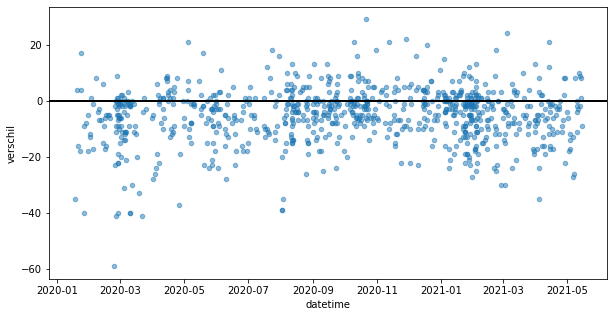

In [24]:
# Plot verschil positief negatief
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 5)
data.plot.scatter(x="datetime", y="verschil", alpha=0.5)
plt.axhline(y=0, linewidth=2, color='black')

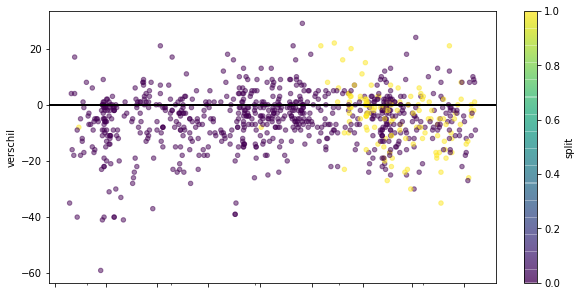

In [25]:
# Plot verschil positief negatief
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 5)
data.plot.scatter(x="datetime", y="verschil", c='split', colormap='viridis', alpha=0.5)
plt.axhline(y=0, linewidth=2, color='black')

<AxesSubplot:xlabel='datetime', ylabel='verhouding'>

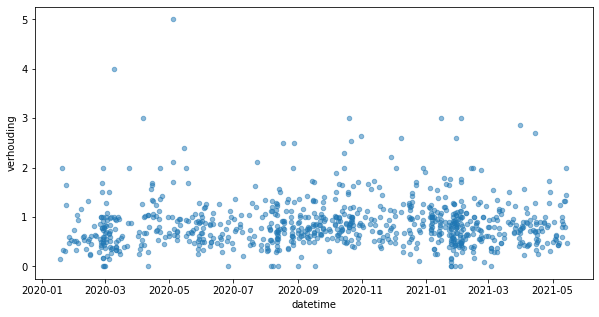

In [26]:
# Plot verhouding positief negatief
plt.rcParams["figure.figsize"] = (10, 5)
data.plot.scatter(x="datetime", y="verhouding", alpha=0.5)

In [27]:
# Gemiddelde per maand
data_mean = data.groupby(pd.Grouper(key='datetime',freq='M')).mean()
data_mean = data_mean.reset_index()
data_mean.head(3)
# Aantal artikelen per maand
data_count = data.groupby(pd.Grouper(key='datetime',freq='M')).count()
data_count = data_count.reset_index()
data_count = data_count[['datetime', 'pagelink']]
data_count = data_count.rename(columns={'pagelink': 'number_of_articles'})
data_count.head(3)
# Samenvoegen
data_mean_count = data_mean.merge(data_count, on = 'datetime', how='left')
data_mean_count.head()

,datetime,positive,negative,verschil,verhouding,split,number_of_articles
0,2020-01-31,18.636364,29.909091,-11.272727,0.775455,0.090909,11
1,2020-02-29,13.729167,22.687500,-8.958333,0.668958,0.000000,50
2,2020-03-31,15.755102,25.408163,-9.653061,0.743061,0.000000,49


<AxesSubplot:xlabel='datetime', ylabel='number_of_articles'>

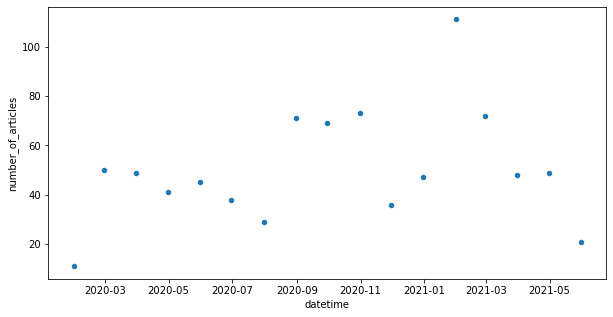

In [28]:
# Plot aantal artikelen per maand
plt.rcParams["figure.figsize"] = (10, 5)
data_mean_count.plot.scatter(x="datetime", y='number_of_articles')

<AxesSubplot:xlabel='datetime', ylabel='verschil'>

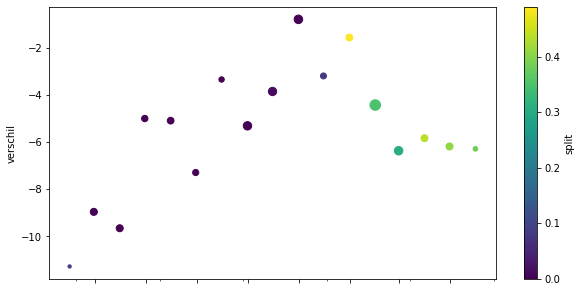

In [29]:
# Plot verschil positief negatief per maand en aantal artikelen en percentage artikelen over vaccinatie
plt.rcParams["figure.figsize"] = (10, 5)
data_mean_count.plot.scatter(x="datetime", y="verschil", s='number_of_articles', c='split', colormap='viridis')

In [30]:
# Twee dataframes: vaccinatie en niet-vaccinatie
grouped = data.groupby('split')
vaccinatie2 = grouped.get_group(1)
niet_vaccinatie2 = grouped.get_group(0)

In [31]:
# Vaccinatie groeperen per maand
vaccinatie = vaccinatie2.groupby(pd.Grouper(key='datetime',freq='M')).mean()
vaccinatie = vaccinatie.reset_index()
vaccinatie.head()

,datetime,positive,negative,verschil,verhouding,split
0,2020-01-31,9.0,17.0,-8.0,0.53,1.0
1,2020-02-29,NaN,NaN,NaN,NaN,NaN
2,2020-03-31,NaN,NaN,NaN,NaN,NaN


In [32]:
# Niet-vaccinatie groeperen per maand
niet_vaccinatie = niet_vaccinatie2.groupby(pd.Grouper(key='datetime',freq='M')).mean()
niet_vaccinatie = niet_vaccinatie.reset_index()
niet_vaccinatie.head()

,datetime,positive,negative,verschil,verhouding,split
0,2020-01-31,19.600000,31.200000,-11.600000,0.800000,0
1,2020-02-29,13.729167,22.687500,-8.958333,0.668958,0
2,2020-03-31,15.755102,25.408163,-9.653061,0.743061,0


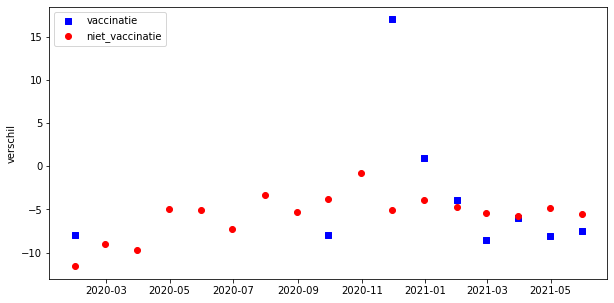

In [33]:
# Plot verschil positief negatief per maand en opgesplitst in vaccinatie/niet-vaccinatie
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(vaccinatie['datetime'], vaccinatie['verschil'], c='b', marker="s", label='vaccinatie')
ax1.scatter(niet_vaccinatie['datetime'], niet_vaccinatie['verschil'], c='r', marker="o", label='niet_vaccinatie')
plt.ylabel("verschil")
plt.legend(loc='upper left')
plt.show()

In [34]:
# Gemiddelde per week
data_mean_week = data.groupby(pd.Grouper(key='datetime',freq='W')).mean()
data_mean_week = data_mean_week.reset_index()
data_mean_week.head()
# Aantal artikelen per week
data_count_week = data.groupby(pd.Grouper(key='datetime',freq='W')).count()
data_count_week = data_count_week.reset_index()
data_count_week = data_count_week[['datetime', 'pagelink']]
data_count_week = data_count_week.rename(columns={'pagelink': 'number_of_articles'})
data_count_week.head()
# Samenvoegen
data_mean_count_week = data_mean_week.merge(data_count_week, on = 'datetime', how='left')
data_mean_count_week.head(3)

,datetime,positive,negative,verschil,verhouding,split,number_of_articles
0,2020-01-19,6.000000,41.000000,-35.0,0.150000,0.000000,1
1,2020-01-26,17.600000,19.400000,-1.8,1.106000,0.000000,5
2,2020-02-02,18.714286,33.714286,-15.0,0.528571,0.142857,7


<AxesSubplot:xlabel='datetime', ylabel='verschil'>

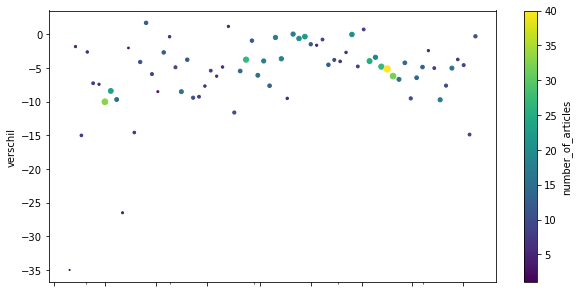

In [35]:
# Plot verschil positief negatief per week en aantal artikelen
plt.rcParams["figure.figsize"] = (10, 5)
data_mean_count_week.plot.scatter(x="datetime", y="verschil", s='number_of_articles', c='number_of_articles', colormap='viridis')

In [36]:
# Artikelen over vaccinatie per week
vaccinatie_week = vaccinatie2.groupby(pd.Grouper(key='datetime',freq='W')).mean()
vaccinatie_week = vaccinatie_week.reset_index()
vaccinatie_week.head(3)
# Artikelen niet over vaccinatie per week
niet_vaccinatie_week = niet_vaccinatie2.groupby(pd.Grouper(key='datetime',freq='W')).mean()
niet_vaccinatie_week = niet_vaccinatie_week.reset_index()
niet_vaccinatie_week.head(3)

,datetime,positive,negative,verschil,verhouding,split
0,2020-01-19,6.000000,41.0,-35.000000,0.150000,0
1,2020-01-26,17.600000,19.4,-1.800000,1.106000,0
2,2020-02-02,20.333333,36.5,-16.166667,0.528333,0


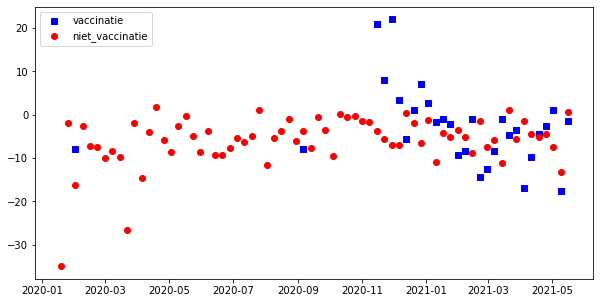

In [37]:
# Plot verschil positief negatief per week en opgesplitst in vaccinatie/niet-vaccinatie
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(vaccinatie_week['datetime'], vaccinatie_week['verschil'], c='b', marker="s", label='vaccinatie')
ax1.scatter(niet_vaccinatie_week['datetime'], niet_vaccinatie_week['verschil'], c='r', marker="o", label='niet_vaccinatie')
plt.legend(loc='upper left');
plt.show()

In [38]:
# Gemiddelde per 2 weken
data_mean_2week = data.groupby(pd.Grouper(key='datetime',freq='2W')).mean()
data_mean_2week = data_mean_2week.reset_index()
data_mean_2week.head()
# Aantal artikelen per 2 weken
data_count_2week = data.groupby(pd.Grouper(key='datetime',freq='2W')).count()
data_count_2week = data_count_2week.reset_index()
data_count_2week = data_count_2week[['datetime', 'pagelink']]
data_count_2week = data_count_2week.rename(columns={'pagelink': 'number_of_articles'})
data_count_2week.head()
# Samenvoegen
data_mean_count_2week = data_mean_2week.merge(data_count_2week, on = 'datetime', how='left')
data_mean_count_2week.head()

,datetime,positive,negative,verschil,verhouding,split,number_of_articles
0,2020-01-19,6.000000,41.000000,-35.000000,0.150000,0.000000,1
1,2020-02-02,18.250000,27.750000,-9.500000,0.769167,0.083333,12
2,2020-02-16,14.615385,20.076923,-5.461538,0.663077,0.000000,14
3,2020-03-01,13.297297,22.945946,-9.648649,0.662973,0.000000,38
4,2020-03-15,15.184211,24.078947,-8.894737,0.757368,0.000000,38


<AxesSubplot:xlabel='datetime', ylabel='verschil'>

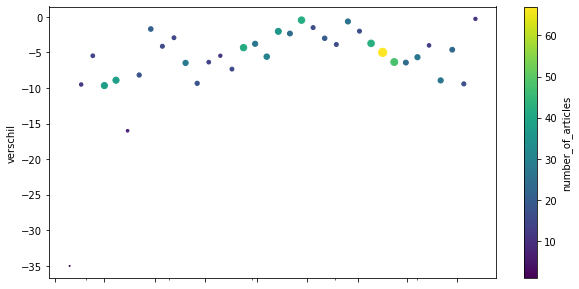

In [39]:
# Plot verschil positief negatief per 2 weken en aantal artikelen
plt.rcParams["figure.figsize"] = (10, 5)
data_mean_count_2week.plot.scatter(x="datetime", y="verschil", s='number_of_articles', c='number_of_articles', colormap='viridis')

In [40]:
# Artikelen over vaccinatie per 2 weken
vaccinatie_2week = vaccinatie2.groupby(pd.Grouper(key='datetime',freq='2W')).mean()
vaccinatie_2week = vaccinatie_2week.reset_index()
vaccinatie_2week.head()
# Artikelen niet over vaccinatie per week
niet_vaccinatie_2week = niet_vaccinatie2.groupby(pd.Grouper(key='datetime',freq='2W')).mean()
niet_vaccinatie_2week = niet_vaccinatie_2week.reset_index()
niet_vaccinatie_2week.head()

,datetime,positive,negative,verschil,verhouding,split
0,2020-01-19,6.000000,41.000000,-35.000000,0.150000,0
1,2020-02-02,19.090909,28.727273,-9.636364,0.790909,0
2,2020-02-16,14.615385,20.076923,-5.461538,0.663077,0
3,2020-03-01,13.297297,22.945946,-9.648649,0.662973,0
4,2020-03-15,15.184211,24.078947,-8.894737,0.757368,0


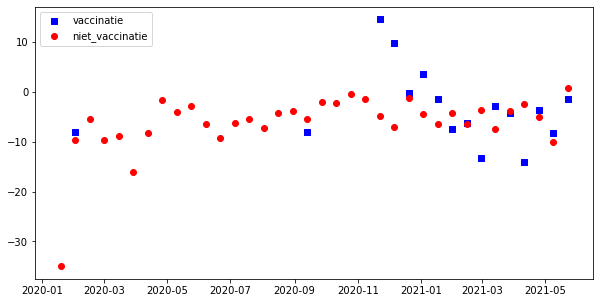

In [41]:
# Plot verschil positief negatief per 2 weken en opgesplitst in vaccinatie/niet-vaccinatie
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(vaccinatie_2week['datetime'], vaccinatie_2week['verschil'], c='b', marker="s", label='vaccinatie')
ax1.scatter(niet_vaccinatie_2week['datetime'], niet_vaccinatie_2week['verschil'], c='r', marker="o", label='niet_vaccinatie')
plt.legend(loc='upper left');
plt.show()

## Toevoegen gedragsdata

In [42]:
gedrag = pd.read_csv('COVID-19_gedrag.csv', sep = ';')
gedrag = gedrag[(gedrag['Subgroup_category']== "Alle") & (gedrag['Region_name']== "Nederland")]
#gedrag['Date_of_measurement'] = pd.to_datetime(gedrag['Date_of_measurement'], format='%d-%m-%Y')
gedrag.head()

,Date_of_report,Date_of_measurement,Wave,Region_code,Region_name,Subgroup_category,Subgroup,Indicator_category,Indicator,Sample_size,Figure_type,Value,Lower_limit,Upper_limit,Change_wrt_previous_measurement
0,2021-05-04 10:00:00,2020-09-29,1,NL00,Nederland,Alle,Totaal,Draagvlak,Avondklok,0,Percentage,NaN,NaN,NaN,NaN
36,2021-05-04 10:00:00,2020-09-29,1,NL00,Nederland,Alle,Totaal,Draagvlak,Bij_klachten_blijf_thuis,5002,Percentage,82.3,81.2,83.5,NaN
72,2021-05-04 10:00:00,2020-09-29,1,NL00,Nederland,Alle,Totaal,Draagvlak,Bij_klachten_laat_testen,4982,Percentage,64.3,62.8,65.8,NaN
108,2021-05-04 10:00:00,2020-09-29,1,NL00,Nederland,Alle,Totaal,Draagvlak,Draag_mondkapje_in_ov,0,Percentage,NaN,NaN,NaN,NaN
144,2021-05-04 10:00:00,2020-09-29,1,NL00,Nederland,Alle,Totaal,Draagvlak,Draag_mondkapje_in_publieke_binnenruimtes,0,Percentage,NaN,NaN,NaN,NaN


In [43]:
#fig = plt.figure()
#ax1 = fig.add_subplot(111)

#ax1.scatter(vaccinatie_2week['datetime'], vaccinatie_2week['verschil'], c='b')

In [44]:
gedrag_mean = gedrag.groupby('Date_of_measurement').mean()
gedrag_mean = gedrag_mean.reset_index()
gedrag_mean = gedrag_mean[['Date_of_measurement', 'Value']]
gedrag_mean['Date_of_measurement'] = pd.to_datetime(gedrag_mean['Date_of_measurement'], format='%Y-%m-%d')
gedrag_mean.head()

,Date_of_measurement,Value
0,2020-09-29,61.110000
1,2020-10-20,69.430357
2,2020-11-10,69.371429
3,2020-12-01,69.161404
4,2020-12-15,71.171930


In [45]:
draagvlak = gedrag[gedrag['Indicator_category'] == 'Draagvlak']
draagvlak['Date_of_measurement'] = pd.to_datetime(draagvlak['Date_of_measurement'])
draagvlak.head()

<ipython-input-45-c7c59f2a64d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  draagvlak['Date_of_measurement'] = pd.to_datetime(draagvlak['Date_of_measurement'])


,Date_of_report,Date_of_measurement,Wave,Region_code,Region_name,Subgroup_category,Subgroup,Indicator_category,Indicator,Sample_size,Figure_type,Value,Lower_limit,Upper_limit,Change_wrt_previous_measurement
0,2021-05-04 10:00:00,2020-09-29,1,NL00,Nederland,Alle,Totaal,Draagvlak,Avondklok,0,Percentage,NaN,NaN,NaN,NaN
36,2021-05-04 10:00:00,2020-09-29,1,NL00,Nederland,Alle,Totaal,Draagvlak,Bij_klachten_blijf_thuis,5002,Percentage,82.3,81.2,83.5,NaN
72,2021-05-04 10:00:00,2020-09-29,1,NL00,Nederland,Alle,Totaal,Draagvlak,Bij_klachten_laat_testen,4982,Percentage,64.3,62.8,65.8,NaN
108,2021-05-04 10:00:00,2020-09-29,1,NL00,Nederland,Alle,Totaal,Draagvlak,Draag_mondkapje_in_ov,0,Percentage,NaN,NaN,NaN,NaN
144,2021-05-04 10:00:00,2020-09-29,1,NL00,Nederland,Alle,Totaal,Draagvlak,Draag_mondkapje_in_publieke_binnenruimtes,0,Percentage,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Date_of_measurement'>

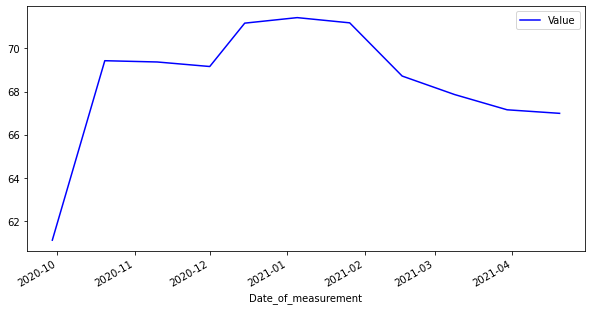

In [46]:
gedrag_mean.plot('Date_of_measurement', 'Value', color='b')

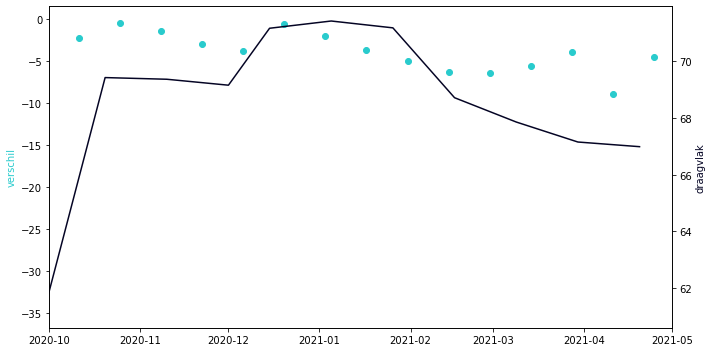

In [49]:
fig, ax1 = plt.subplots()

color = '#29cbcd'
ax1.set_ylabel('verschil', color=color)
ax1.scatter(data_mean_count_2week['datetime'], data_mean_count_2week['verschil'], color='#29cbcd')
#ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = '#040424'
ax2.set_ylabel('draagvlak', color=color)  # we already handled the x-label with ax1
ax2.plot(gedrag_mean['Date_of_measurement'], gedrag_mean['Value'], color='#040424')
ax2.tick_params(axis='y', labelcolor='0')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.xlim('2020-10', '2021-05')
plt.show()

No handles with labels found to put in legend.


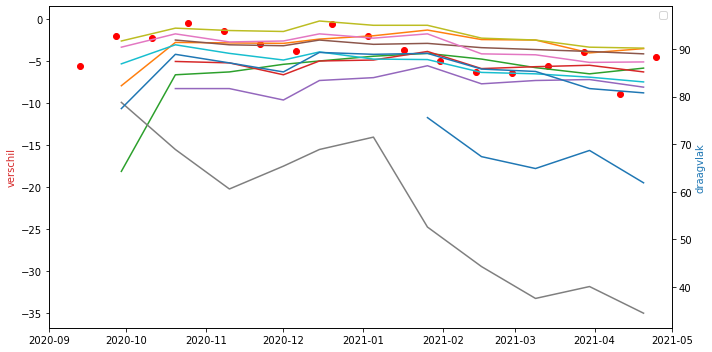

In [48]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_ylabel('verschil', color=color)
ax1.scatter(data_mean_count_2week['datetime'], data_mean_count_2week['verschil'], color='r')

ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('draagvlak', color=color) # we already handled the x-label with ax1
ax2.plot(draagvlak.groupby(['Date_of_measurement', 'Indicator'])['Value'].mean().unstack())

ax2.legend()

fig.tight_layout() # otherwise the right y-label is slightly clipped
plt.xlim('2020-09-01', '2021-05-01')
plt.show()